In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [97]:
### Read in data
df = pd.read_csv('data/AppleStore.csv', index_col=0)
df = df.drop(columns=['id','size_bytes','currency','rating_count_ver','user_rating_ver','ver','vpp_lic', 'track_name'])

df = df.reset_index()
# separate out categorical variables for later
one_hot = pd.get_dummies(df['prime_genre'])
one_hot2 = pd.get_dummies(df['cont_rating'])
one_hot = one_hot.join(one_hot2)

# separate out my target variable
y = df['user_rating']


# drop the categorical and target variables so that all that is left in df is explanatory numerical variables
df = df.drop(columns = ['user_rating', 'prime_genre', 'cont_rating'])


df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 6 columns):
index               7197 non-null int64
price               7197 non-null float64
rating_count_tot    7197 non-null int64
sup_devices.num     7197 non-null int64
ipadSc_urls.num     7197 non-null int64
lang.num            7197 non-null int64
dtypes: float64(1), int64(5)
memory usage: 337.4 KB


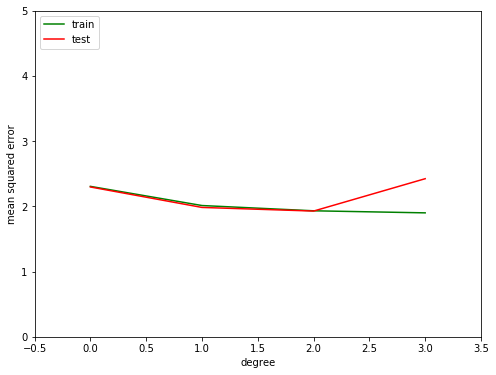

In [98]:
### finding what polynomial fits the NUMERICAL explanatory data the best

degrees = 4

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.25)

train_error = []
test_error = []

for degree in range(degrees):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    train_error.append(mean_squared_error(y_train, model.predict(X_train)))
    test_error.append(mean_squared_error(y_test, model.predict(X_test)))
    
# Plot the training and test errors against degree
plt.figure(figsize=(8,6))
plt.plot(np.arange(degrees), train_error, color='green', label='train')
plt.plot(np.arange(degrees), test_error, color='red', label='test')
plt.ylabel('mean squared error')
plt.xlabel('degree')
plt.xlim((-.5,3.5))
plt.ylim((0,5))
plt.legend(loc='upper left')

# I conclude that additional polynomial features does not help my model so i dont need to do that

In [99]:
df.head()

,index,price,rating_count_tot,sup_devices.num,ipadSc_urls.num,lang.num
0,1,3.99,21292,38,5,10
1,2,0.00,161065,37,5,23
2,3,0.00,188583,37,5,3
3,4,0.00,262241,37,5,9
4,5,0.00,985920,37,5,45


In [100]:
# a polynomial of degree 2 include original columns, columns squared, and interaction columns
#standard scaler column by columns turns things into zscores
model = make_pipeline(PolynomialFeatures(2), StandardScaler())
model.fit(df)
pd.DataFrame(model.transform(df)).head() # i FINALLY have the transformed numerical data i want

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.0,-1.538131,0.388126,0.110902,0.170753,0.651051,0.576471,-0.960142,-0.386895,-0.205375,...,-0.039363,0.113566,0.194484,0.036243,0.140145,0.683609,0.603138,0.70676,0.793018,0.025535
1,0.0,-1.537808,-0.295960,1.956477,-0.096808,0.651051,2.218083,-0.960142,-0.387120,-0.202544,...,0.144778,1.913841,2.608732,2.135575,-0.167857,0.617593,2.197507,0.70676,2.604043,1.438922
2,0.0,-1.537484,-0.295960,2.319827,-0.096808,0.651051,-0.307474,-0.960142,-0.387120,-0.200252,...,0.214288,2.269738,3.084040,0.248384,-0.167857,0.617593,-0.307447,0.70676,-0.182150,-0.274274
3,0.0,-1.537161,-0.295960,3.292413,-0.096808,0.651051,0.450193,-0.960142,-0.387120,-0.195706,...,0.454188,3.222375,4.356308,1.327290,-0.167857,0.617593,0.444040,0.70676,0.653708,-0.037062
4,0.0,-1.536838,-0.295960,12.847931,-0.096808,0.651051,4.996197,-0.960142,-0.387120,-0.159195,...,6.979773,12.581890,16.856150,26.583801,-0.167857,0.617593,4.952957,0.70676,5.668856,6.367657


In [101]:
# merge the numerical info and categorical info back together
X = one_hot.join(pd.DataFrame(model.transform(df)))
X

,Book,Business,Catalogs,Education,Entertainment,Finance,Food & Drink,Games,Health & Fitness,Lifestyle,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,1,0,0,...,-0.039363,0.113566,0.194484,0.036243,0.140145,0.683609,0.603138,0.706760,0.793018,0.025535
1,0,0,0,0,0,0,0,0,0,0,...,0.144778,1.913841,2.608732,2.135575,-0.167857,0.617593,2.197507,0.706760,2.604043,1.438922
2,0,0,0,0,0,0,0,0,0,0,...,0.214288,2.269738,3.084040,0.248384,-0.167857,0.617593,-0.307447,0.706760,-0.182150,-0.274274
3,0,0,0,0,0,0,0,0,0,0,...,0.454188,3.222375,4.356308,1.327290,-0.167857,0.617593,0.444040,0.706760,0.653708,-0.037062
4,0,0,0,0,0,0,0,0,0,0,...,6.979773,12.581890,16.856150,26.583801,-0.167857,0.617593,4.952957,0.706760,5.668856,6.367657
5,0,0,0,0,0,0,0,1,0,0,...,-0.042146,-0.033665,-0.030734,-0.086814,3.281764,1.277753,-0.524091,0.706760,-0.460769,-0.300631
6,0,0,0,0,0,1,0,0,0,0,...,0.060506,1.376103,-0.173285,1.273228,-0.167857,-1.824998,1.696516,-1.709102,-0.600079,0.885428
7,0,0,0,0,0,0,0,0,0,0,...,9.131336,14.404947,15.398050,0.585767,-0.167857,0.129075,-0.557942,-0.162951,-0.488631,-0.300631
8,0,0,0,0,0,0,0,0,0,0,...,-0.042629,-0.154805,-0.153991,-0.091105,-0.167857,0.617593,-0.557942,0.706760,-0.460769,-0.300631
9,0,0,0,0,0,0,0,1,0,0,...,-0.042189,-0.064517,-0.173285,-0.044367,0.140145,-1.824998,0.603138,-1.709102,-0.600079,0.025535


In [102]:
# run your regression
model = RidgeCV(cv=10, alphas = [0.00001,0.1,1])
model.fit(X,y)
model.score(X,y)

0.1968219096922058

In [103]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 55 columns):
Book                 7197 non-null uint8
Business             7197 non-null uint8
Catalogs             7197 non-null uint8
Education            7197 non-null uint8
Entertainment        7197 non-null uint8
Finance              7197 non-null uint8
Food & Drink         7197 non-null uint8
Games                7197 non-null uint8
Health & Fitness     7197 non-null uint8
Lifestyle            7197 non-null uint8
Medical              7197 non-null uint8
Music                7197 non-null uint8
Navigation           7197 non-null uint8
News                 7197 non-null uint8
Photo & Video        7197 non-null uint8
Productivity         7197 non-null uint8
Reference            7197 non-null uint8
Shopping             7197 non-null uint8
Social Networking    7197 non-null uint8
Sports               7197 non-null uint8
Travel               7197 non-null uint8
Utilities            7197 non-nu